In [1]:
# y --> 0/1
# X & y
# Multi collinearity
#  independent variables are linearly relaed to log odds

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
sns.set(style='white')

In [4]:
data = pd.read_csv('banking.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [7]:
data['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [10]:
data['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [16]:
data.groupby('job').mean(numeric_only=True)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [15]:
data.groupby('y').mean(numeric_only=True)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Text(0, 0.5, 'Freq of purchase')

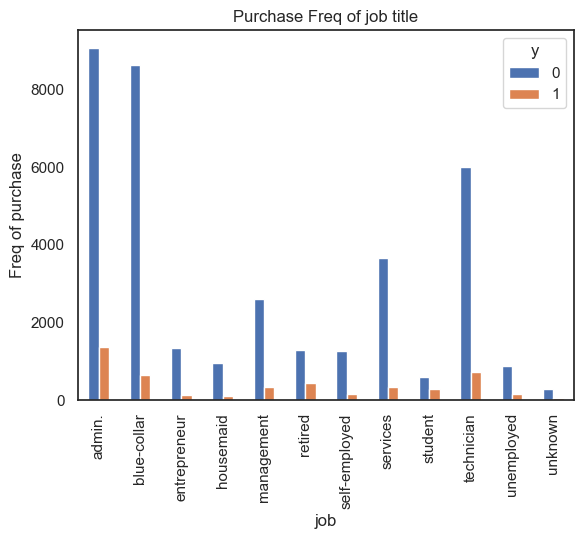

In [17]:
%matplotlib inline
pd.crosstab(data['job'],data['y']).plot(kind='bar')
plt.title("Purchase Freq of job title")
plt.xlabel("job")
plt.ylabel('Freq of purchase')

Text(0, 0.5, 'Freq of purchase')

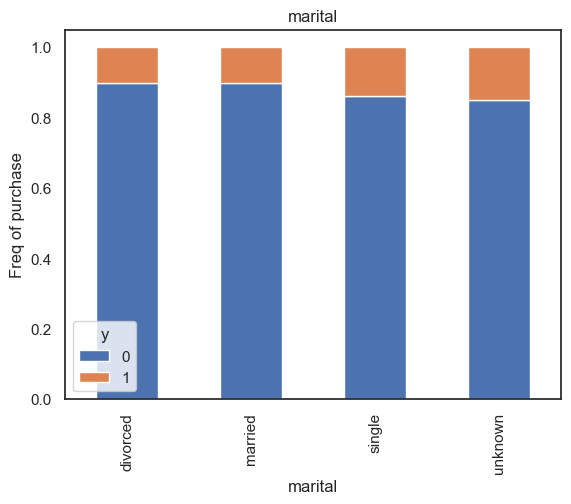

In [18]:
%matplotlib inline
table = pd.crosstab(data['marital'],data['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("marital")
plt.xlabel("marital")
plt.ylabel('Freq of purchase')

<Axes: xlabel='education'>

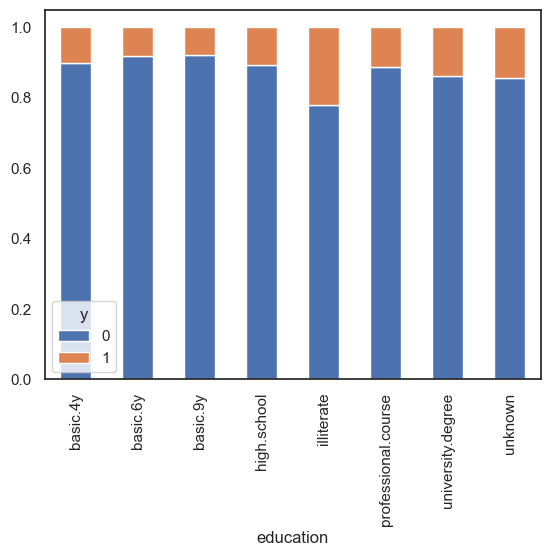

In [19]:
%matplotlib inline
table = pd.crosstab(data['education'],data['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [21]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


<Axes: >

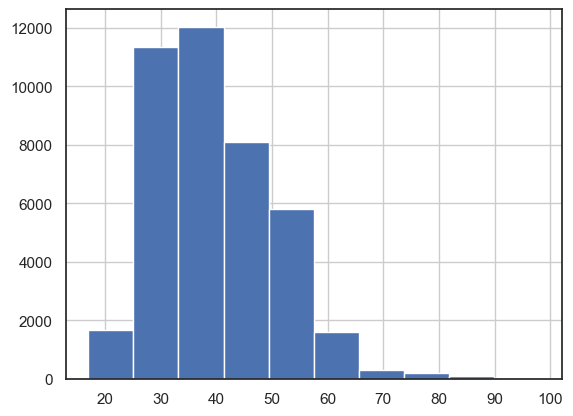

In [22]:
data['age'].hist()

In [20]:
#one hot encoding 
data_final = pd.get_dummies(data, drop_first=True)
data_final.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,False,False,False,False,False,True,False,False,True,False
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,False,True,False,False,False,False,False,False,True,False
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,False,False,False,False,False,True,False,False,False,True
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,False,False,False,False,False,False,False,False,True,False
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,False,False,False,False,False,False,False,False,False,True


In [21]:
# Smote
X = data_final.drop(columns='y')
y = data_final['y']

In [26]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

ImportError: cannot import name '_deprecate_Xt_in_inverse_transform' from 'sklearn.utils.deprecation' (C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py)

In [25]:
os_data_y['y'].value_counts(normalize=True)

NameError: name 'os_data_y' is not defined

In [30]:
# Recursive Feature Elimination technique
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

ImportError: cannot import name '_get_additional_lbfgs_options_dict' from 'sklearn.utils.fixes' (C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\fixes.py)

In [35]:
cols = X.columns[rfe.support_]
cols

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_self-employed', 'job_services', 'job_technician',
       'job_unemployed', 'job_unknown', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_success'],
      dtype='object')

In [36]:
X=os_data_X[cols]
y=os_data_y['y']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  **_get_additional_lbfgs_options_dict("iprint", iprint),


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [34]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [ ]:
# Evaluation metrics of Classification task

In [ ]:
# accuracy --> number of correct predictions/total number of predictions

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score,recall_score

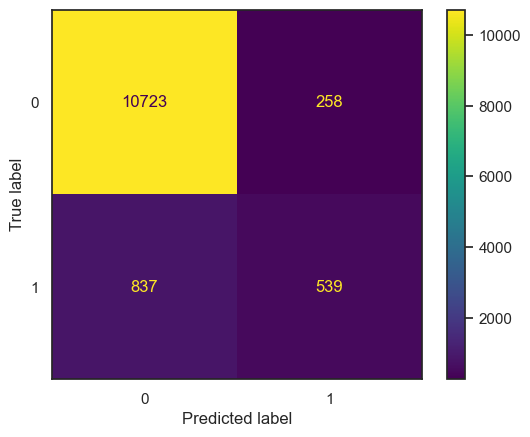

In [35]:
cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=[0,1])
cm_display.plot()
plt.show()

- True Negative (Top-Left Quadrant)
- False Positive (Top-Right Quadrant)
- False Negative (Bottom-Left Quadrant)
- True Positive (Bottom-Right Quadrant)

In [36]:
print(f"Precision score is {precision_score(y_test,y_pred)}")
print(f"Recall score is {recall_score(y_test,y_pred)}")
print(f"f1-score is {f1_score(y_test,y_pred)}")

Precision score is 0.6762860727728983
Recall score is 0.39171511627906974
f1-score is 0.49608835710998617


In [42]:
# ROC AUC Score

In [37]:
from sklearn.metrics import roc_auc_score
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[0.95463309, 0.04536691],
       [0.69754566, 0.30245434],
       [0.99001448, 0.00998552],
       ...,
       [0.97152031, 0.02847969],
       [0.980197  , 0.019803  ],
       [0.92141964, 0.07858036]])

In [38]:
roc_auc_score(y_test,y_pred_proba[:,1])

0.9249380007327668

In [39]:
from sklearn.metrics import roc_curve

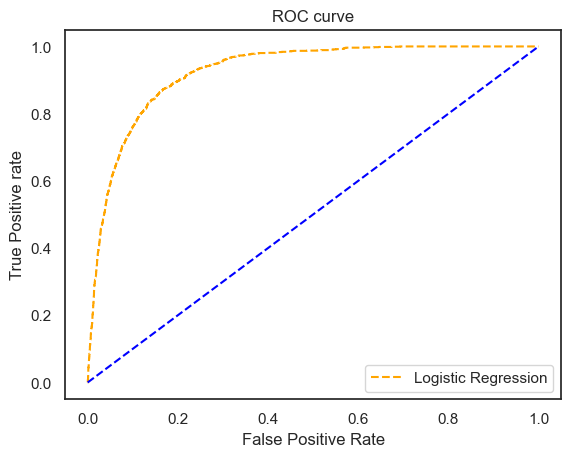

In [40]:
fpr,tpr, threshoold = roc_curve(y_test,y_pred_proba[:,1])
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();